In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('loan_cleaned.csv')
df.head()

,applicant_id,gender,age,marital_status,dependents,education,employment_status,occupation_type,residential_status,city/town,...,loan_amount_requested,loan_term,loan_purpose,interest_rate,loan_type,co-applicant,bank_account_history,transaction_frequency,default_risk,loan_approval_status
0,1,Female,25,Married,2,Graduate,Employed,Business,Own,Urban,...,24535,209,Home,4.27,Secured,Yes,8,20,0.81,1
1,2,Male,36,Married,2,High School,Employed,Business,Own,Suburban,...,8288,33,Home,14.78,Unsecured,Yes,9,9,0.17,0
2,3,Male,43,Single,0,Postgraduate,Self-Employed,Freelancer,Own,Urban,...,10308,159,Vehicle,12.33,Secured,Yes,7,27,0.25,0
3,4,Female,28,Married,0,High School,Self-Employed,Freelancer,Rent,Suburban,...,33937,39,Personal,8.77,Secured,No,9,16,0.27,1
4,5,Female,32,Single,0,Graduate,Employed,Salaried,Rent,Suburban,...,23360,34,Home,9.04,Unsecured,No,1,17,0.32,1


In [3]:
df.drop('applicant_id', axis=1, inplace=True)
df.head()

,gender,age,marital_status,dependents,education,employment_status,occupation_type,residential_status,city/town,annual_income,...,loan_amount_requested,loan_term,loan_purpose,interest_rate,loan_type,co-applicant,bank_account_history,transaction_frequency,default_risk,loan_approval_status
0,Female,25,Married,2,Graduate,Employed,Business,Own,Urban,139901,...,24535,209,Home,4.27,Secured,Yes,8,20,0.81,1
1,Male,36,Married,2,High School,Employed,Business,Own,Suburban,21162,...,8288,33,Home,14.78,Unsecured,Yes,9,9,0.17,0
2,Male,43,Single,0,Postgraduate,Self-Employed,Freelancer,Own,Urban,27815,...,10308,159,Vehicle,12.33,Secured,Yes,7,27,0.25,0
3,Female,28,Married,0,High School,Self-Employed,Freelancer,Rent,Suburban,137853,...,33937,39,Personal,8.77,Secured,No,9,16,0.27,1
4,Female,32,Single,0,Graduate,Employed,Salaried,Rent,Suburban,81753,...,23360,34,Home,9.04,Unsecured,No,1,17,0.32,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50499 entries, 0 to 50498
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      50499 non-null  object 
 1   age                         50499 non-null  int64  
 2   marital_status              50499 non-null  object 
 3   dependents                  50499 non-null  int64  
 4   education                   50499 non-null  object 
 5   employment_status           50499 non-null  object 
 6   occupation_type             50499 non-null  object 
 7   residential_status          50499 non-null  object 
 8   city/town                   50499 non-null  object 
 9   annual_income               50499 non-null  int64  
 10  monthly_expenses            50499 non-null  int64  
 11  credit_score                50499 non-null  int64  
 12  existing_loans              50499 non-null  int64  
 13  total_existing_loan_amount  504

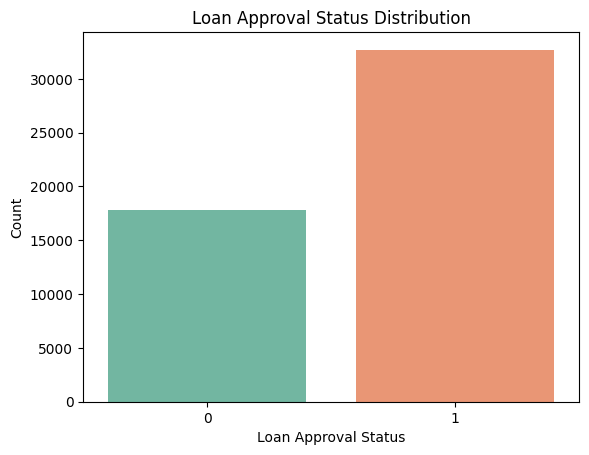

In [5]:
sns.countplot(x='loan_approval_status', data=df, palette='Set2') 
plt.xlabel('Loan Approval Status')
plt.ylabel('Count')
plt.title('Loan Approval Status Distribution')  
plt.show()

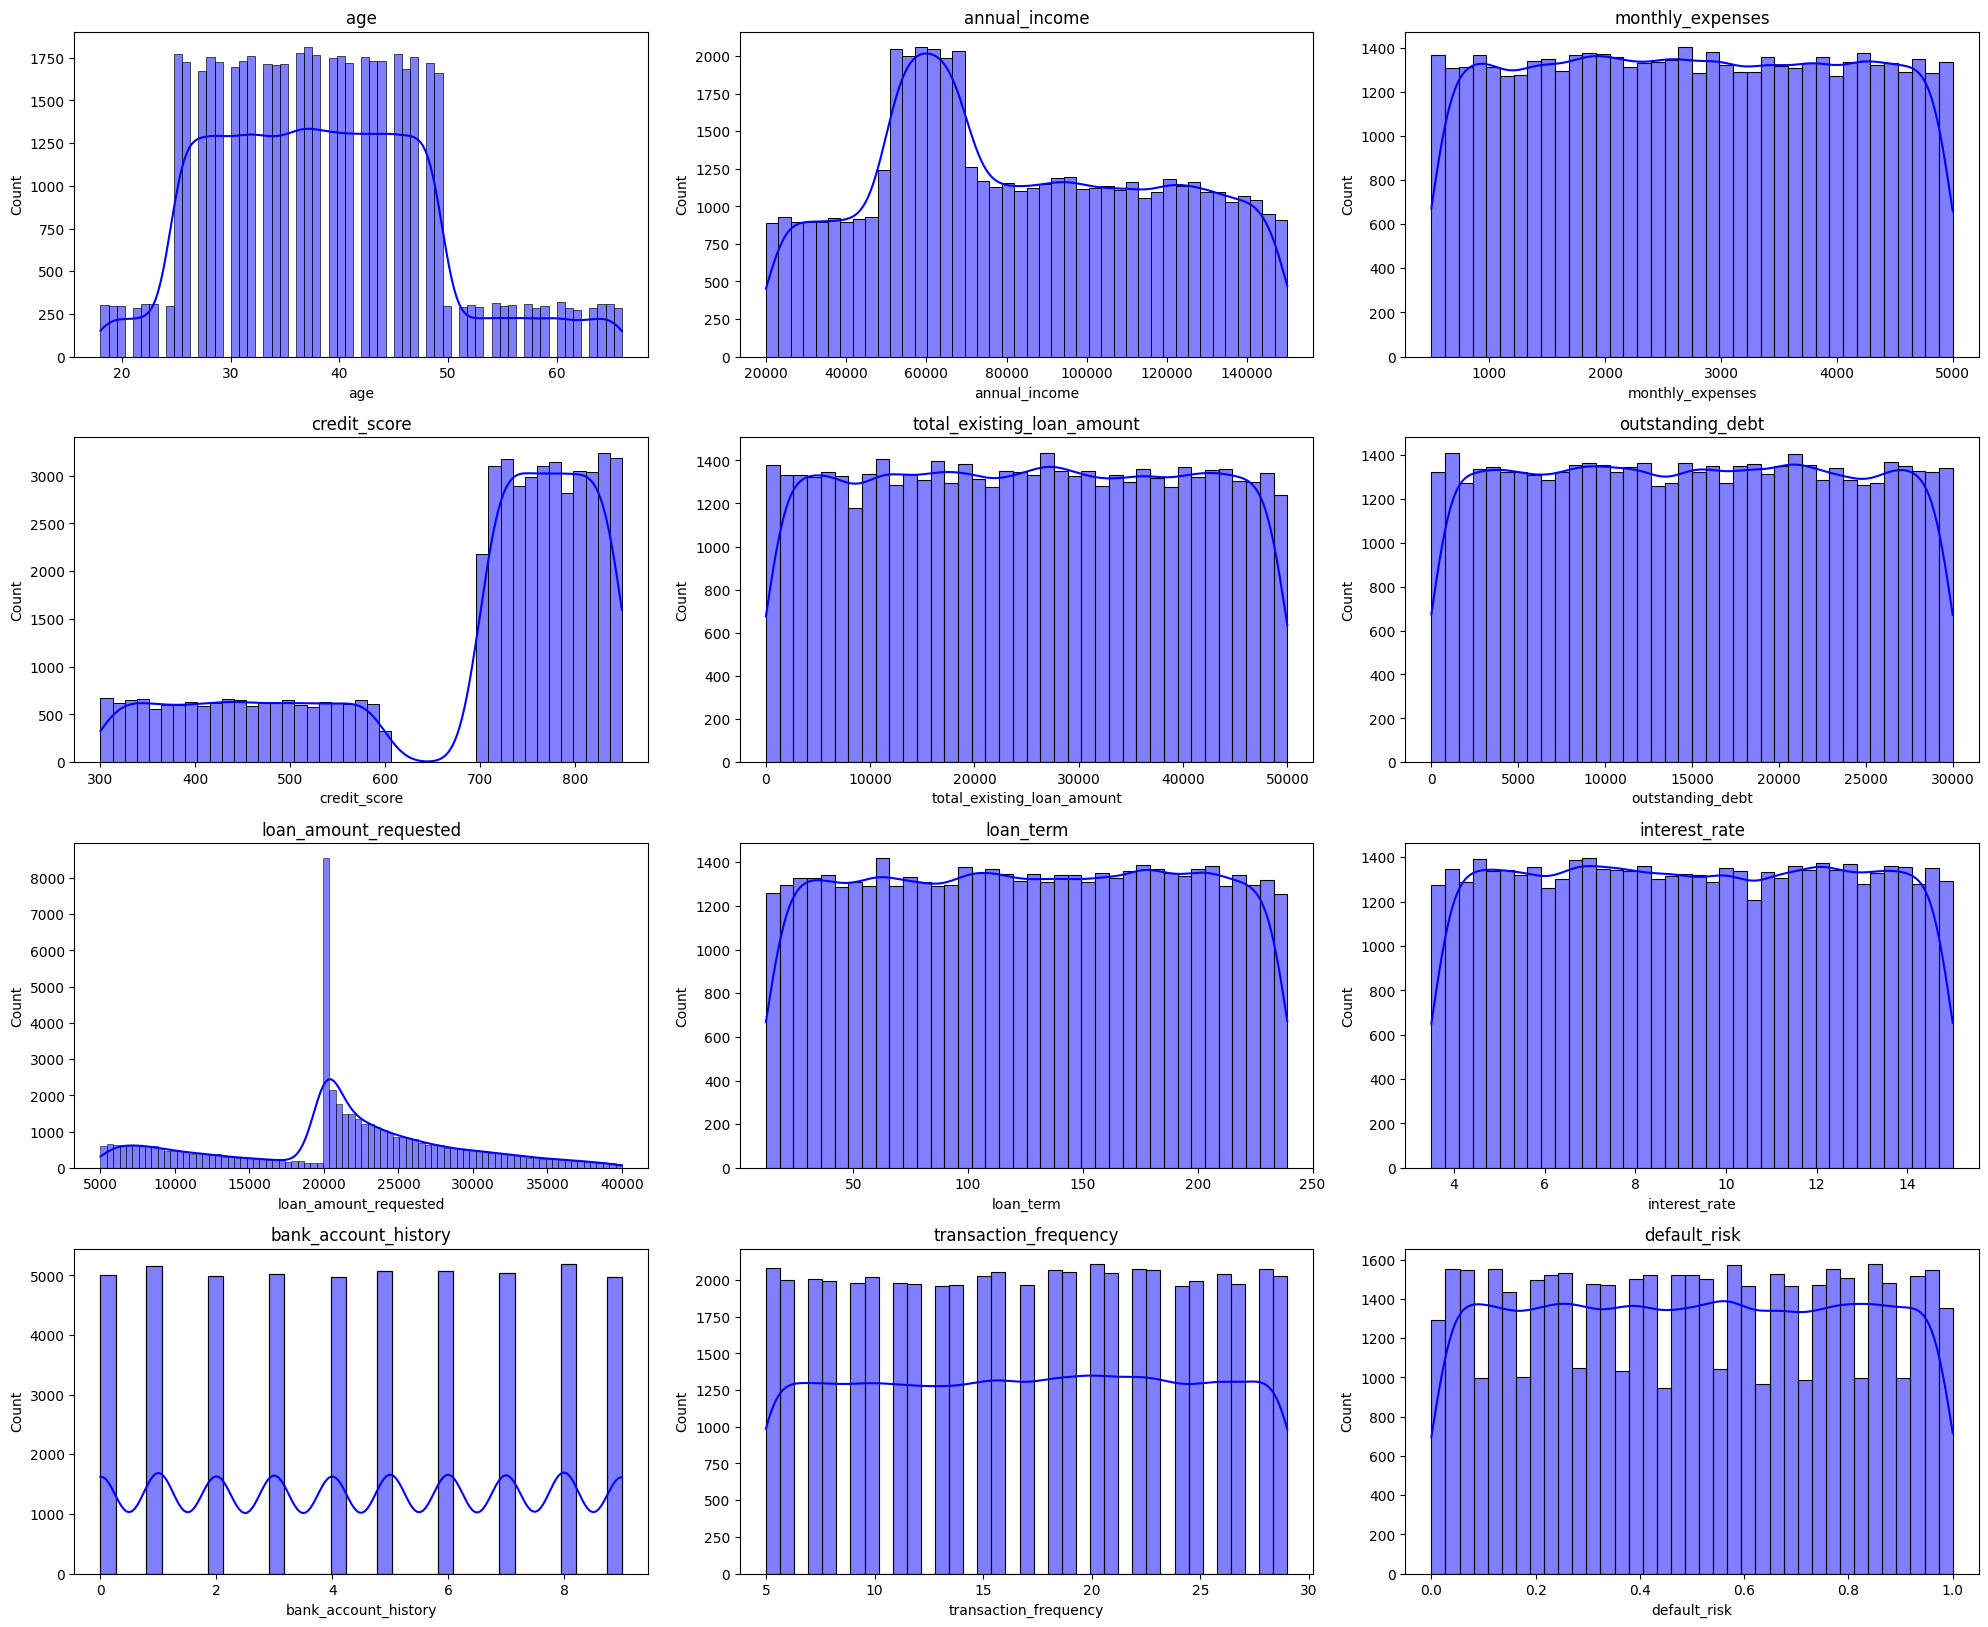

In [6]:
distribution_features = [ 'age',  'annual_income',
                        'monthly_expenses', 'credit_score', 
                        'total_existing_loan_amount', 'outstanding_debt',
                        'loan_amount_requested', 'loan_term', 'interest_rate', 'bank_account_history',
                         'transaction_frequency', 'default_risk',]
plt.figure(figsize=(20, 20))  

for i, col in enumerate(distribution_features, 1):
    plt.subplot(5, 3, i)  
    sns.histplot(df[col], kde=True, color='blue')  
    plt.title(col)  
    plt.xlabel(col)
    

plt.tight_layout()
plt.show()

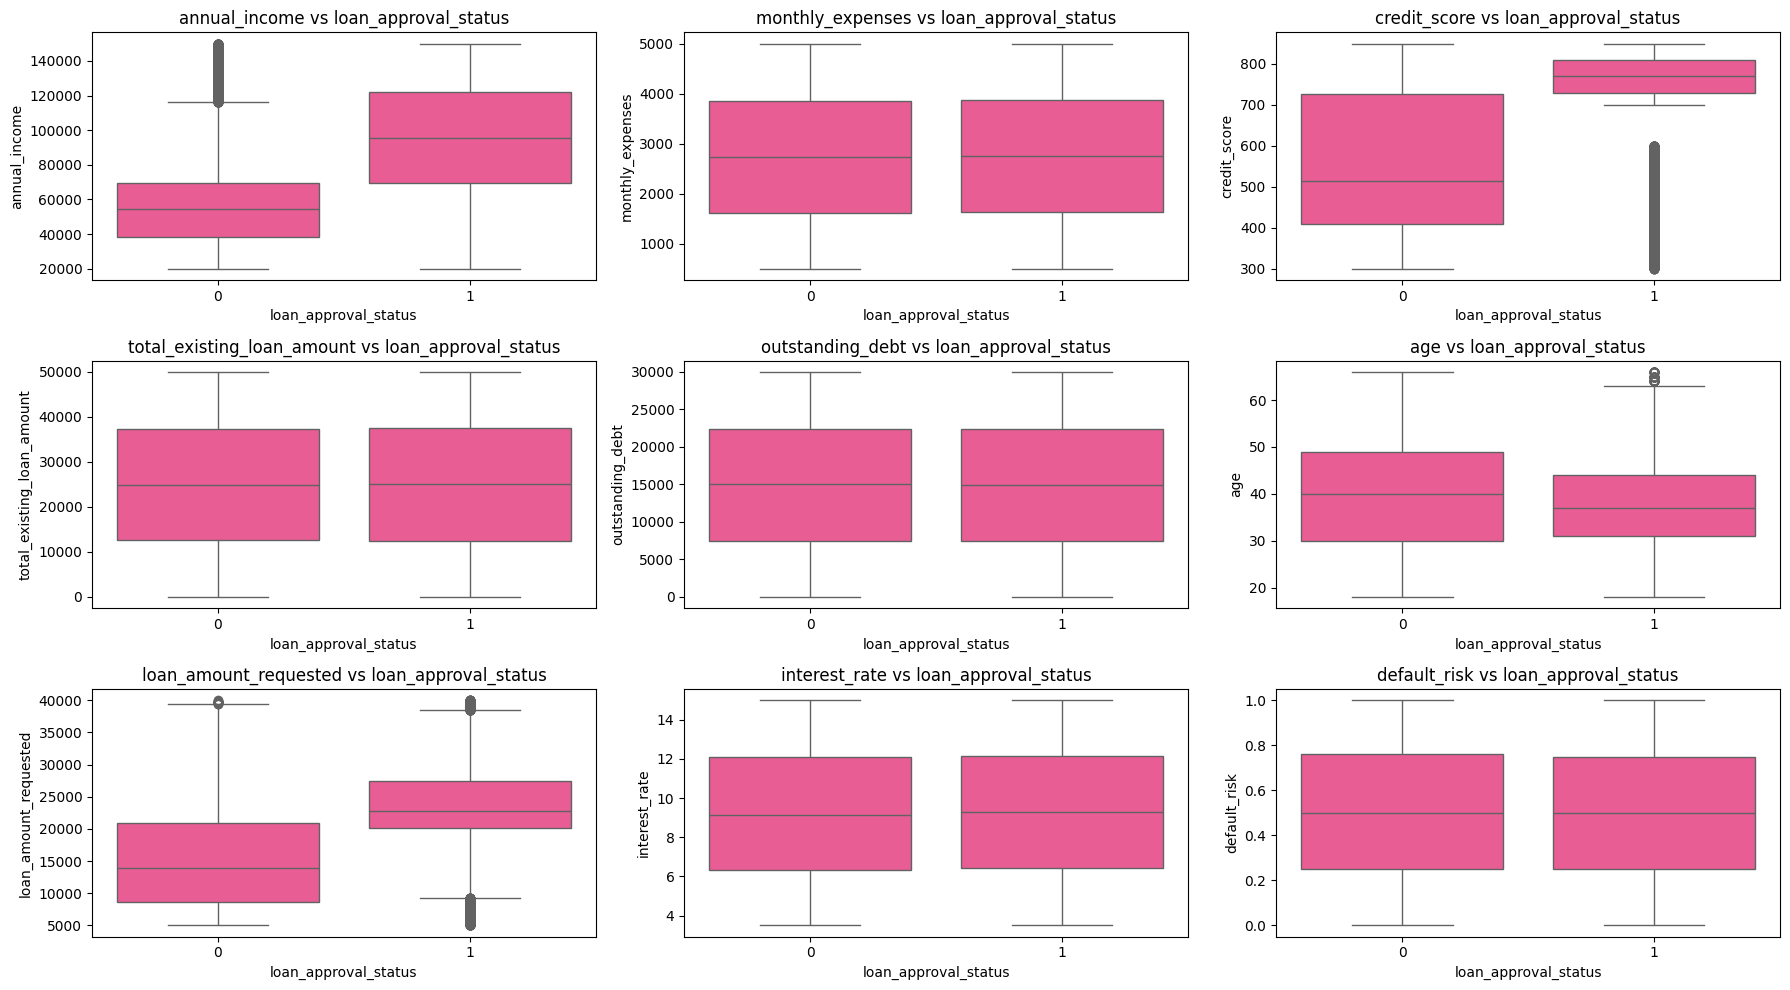

In [7]:
# สร้างกราฟที่มี 3 แถว 4 คอลัมน์
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18, 10))

# กำหนดค่า x และ y สำหรับกราฟ
features = [
    'annual_income', 'monthly_expenses', 'credit_score',
     'total_existing_loan_amount', 'outstanding_debt','age',
    'loan_amount_requested', 'interest_rate', 'default_risk'
]

# วนลูปสร้าง boxplot สำหรับแต่ละฟีเจอร์
for idx, feature in enumerate(features):
    row = idx // 3  # หาตำแหน่งแถว
    col = idx % 3   # หาตำแหน่งคอลัมน์

    sns.boxplot(
        x='loan_approval_status', 
        y=feature, 
        data=df, 
        color='#FF468F', 
        ax=ax[row, col]
    )
    ax[row, col].set_title(f'{feature} vs loan_approval_status')

# ปรับ layout ให้พอดี
plt.tight_layout()

# แสดงผล
plt.show()


In [8]:
df.groupby('loan_approval_status')[['annual_income', 'credit_score', 'loan_amount_requested','age']].mean()

,annual_income,credit_score,loan_amount_requested,age
loan_approval_status,,,,
0,61190.654752,548.391446,15523.303490,40.418030
1,95597.133278,752.612579,23984.907204,37.336116


In [9]:
df['age_group'] = pd.cut(df['age'], bins=[17, 24, 39, 55, float('inf')], labels=[ 'Young Adult','Middle Adult','Middle Age', 'Early Retirement'])
df['trans_freq_level'] =  pd.cut(df['transaction_frequency'], bins=[5, 17, 23, float('inf')], labels=[ 'Low','Meduium','High']) 

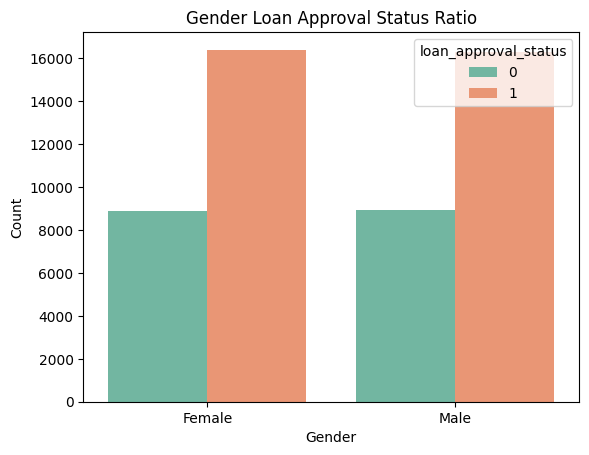

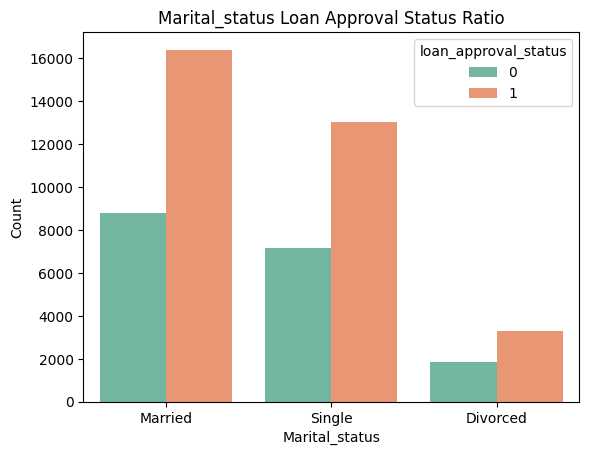

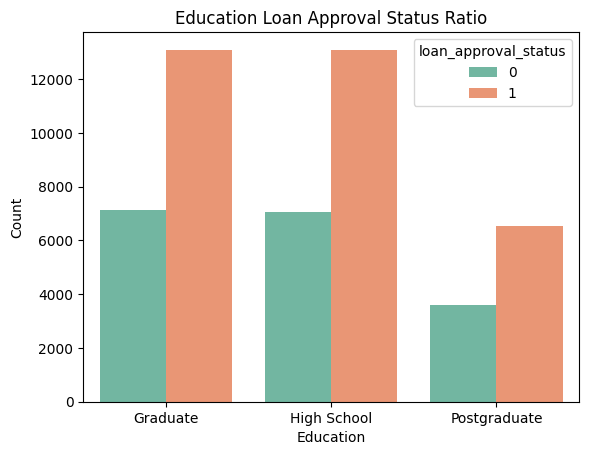

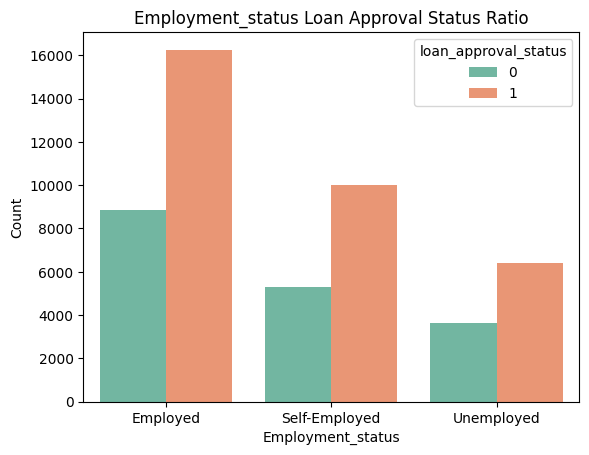

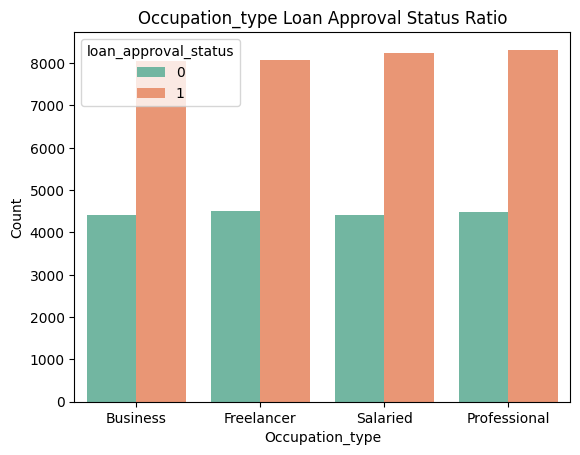

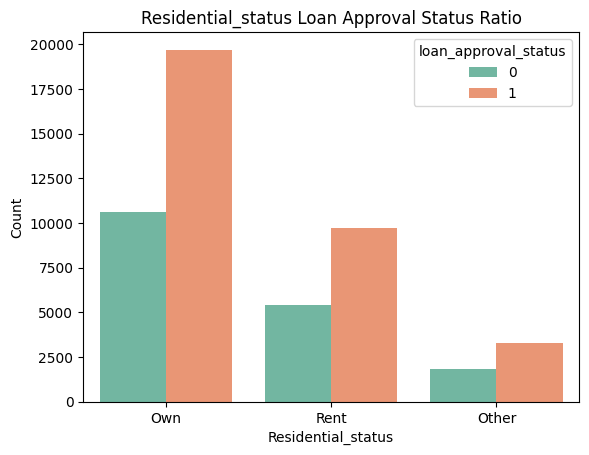

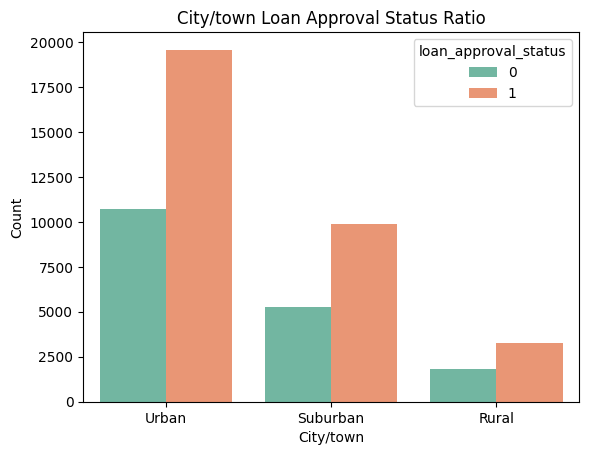

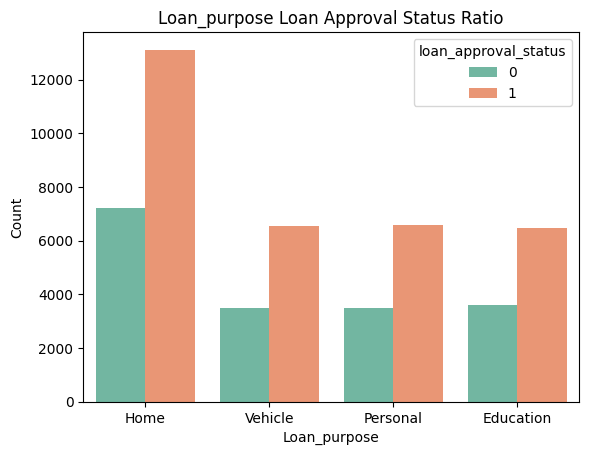

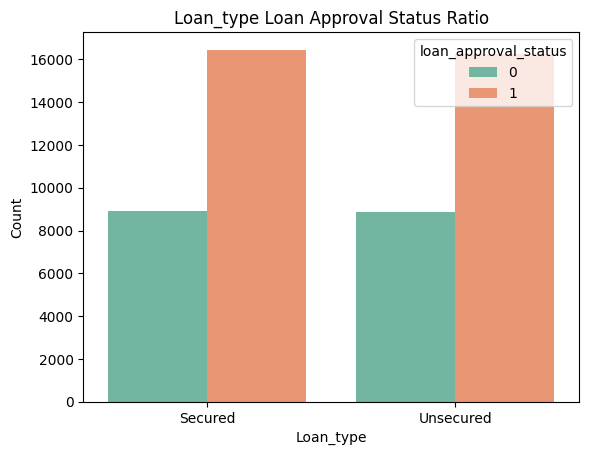

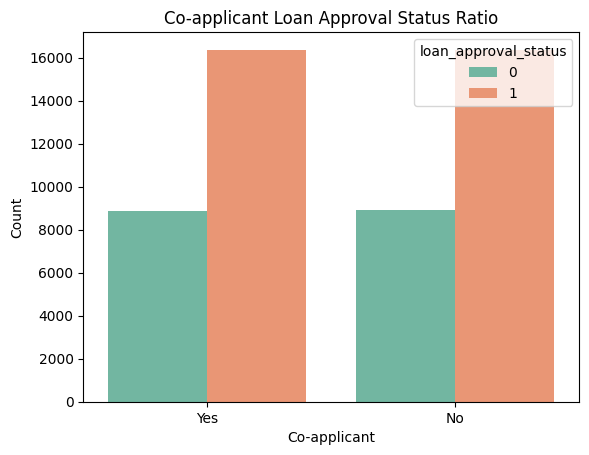

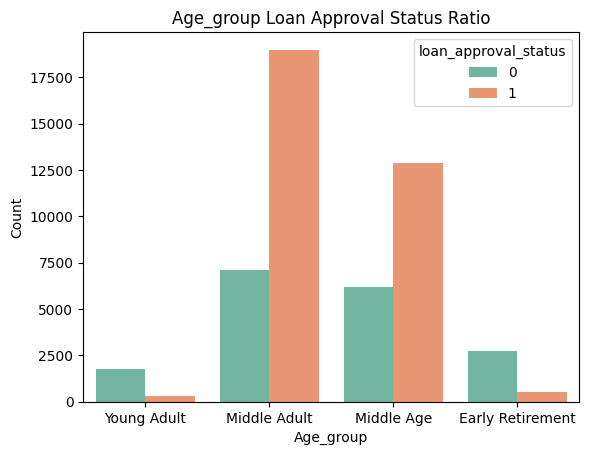

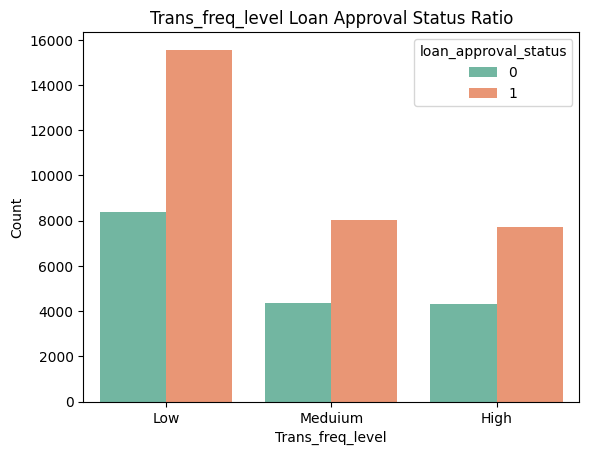

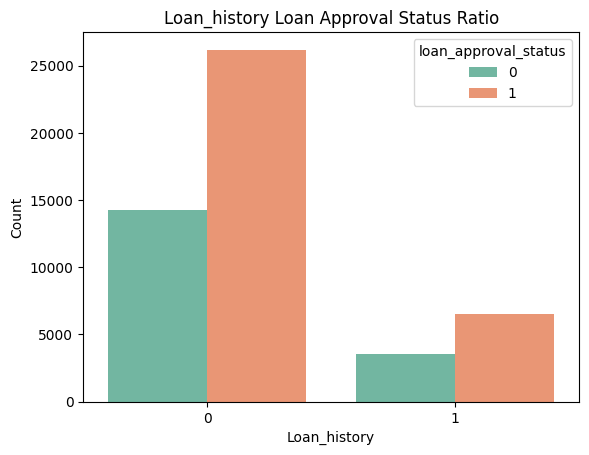

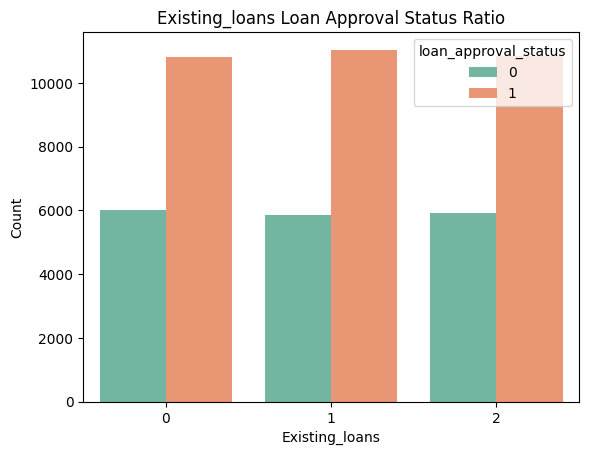

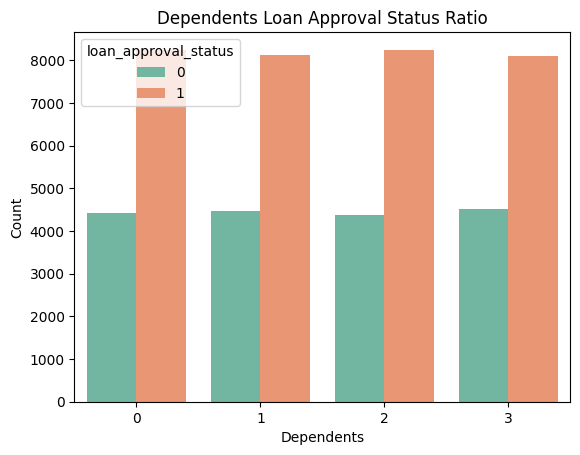

In [10]:
catg_features = df.select_dtypes(include=['object','category']).columns.tolist() 

catg_features.extend([ 'loan_history', 'existing_loans','dependents'])


for col in catg_features:
    col_title = col.capitalize()
    
    sns.countplot(x=col, data=df, palette='Set2', hue='loan_approval_status')
    
    plt.xlabel(col_title)
    plt.ylabel('Count')
    plt.title(col_title + ' Loan Approval Status Ratio')
    
    plt.show()


In [ ]:
categorical_columns = ['gender',
 'marital_status',
 'education',
 'employment_status',
 'occupation_type',
 'residential_status',
 'city/town',
 'loan_purpose',
 'loan_type',
 'co-applicant',
 'loan_history',
 'existing_loans',
 'loan_history', 
 'existing_loans',
 'dependents',
 'age_group',
 'trans_freq_level']

def chi_square_test(df, column, target):
    contingency_table = pd.crosstab(df[column], df[target])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    if p < 0.05:
        print(f"Reject H0: There is a significant relationship between {column} and {target}.")
        print('*'*50)



for column in categorical_columns:
    chi_square_test(df, column, 'loan_approval_status')

Reject H0: There is a significant relationship between employment_status and loan_approval_status.
**************************************************
Reject H0: There is a significant relationship between age_group and loan_approval_status.
**************************************************


In [ ]:
# เลือกฟีเจอร์หมวดหมู่ที่ต้องการตรวจสอบ
categorical_features = ['Loan_Purpose', 'Education', 'Employment_Status']

# Loop วิเคราะห์ ANOVA สำหรับแต่ละฟีเจอร์
for feature in categorical_features:
    groups = [df[df[feature] == value]['credit_score'] for value in df[feature].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    
    print(f"Feature: {feature}")
    print(f"F-Statistic: {f_stat}")
    print(f"P-Value: {p_value}\n")

    # ตรวจสอบผลลัพธ์
    if p_value < 0.05:
        print(f"{feature} มีผลต่อ Interest Rate (P-Value < 0.05)\n")
    else:
        print(f"{feature} ไม่มีผลต่อ Interest Rate (P-Value >= 0.05)\n")

In [12]:
#feature Engineering
df['diff_income_to_expenses'] = (df['annual_income']/12) - df['monthly_expenses'] 
df['debt_to_income_ratio'] = df['outstanding_debt'] / df['annual_income']
df['loan_to_value_ratio'] = df['loan_amount_requested'] / df['annual_income']
df['credit_utilize'] = df['outstanding_debt'] / df['total_existing_loan_amount']

In [18]:
df['credit_score'].describe()

count    50499.000000
mean       680.656567
std        158.891116
min        300.000000
25%        560.000000
50%        744.000000
75%        797.000000
max        849.000000
Name: credit_score, dtype: float64

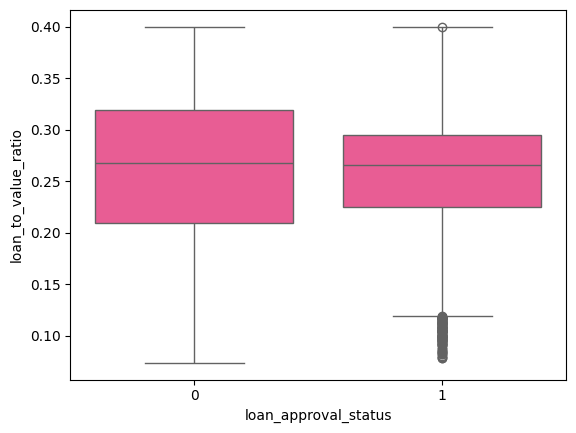

In [15]:
sns.boxplot(
        x='loan_approval_status', 
        y='loan_to_value_ratio', 
        data=df, 
        color='#FF468F'
    )
plt.show()

In [16]:
df.groupby('loan_approval_status')[['loan_to_value_ratio']].mean()

,loan_to_value_ratio
loan_approval_status,
0,0.263004
1,0.262813


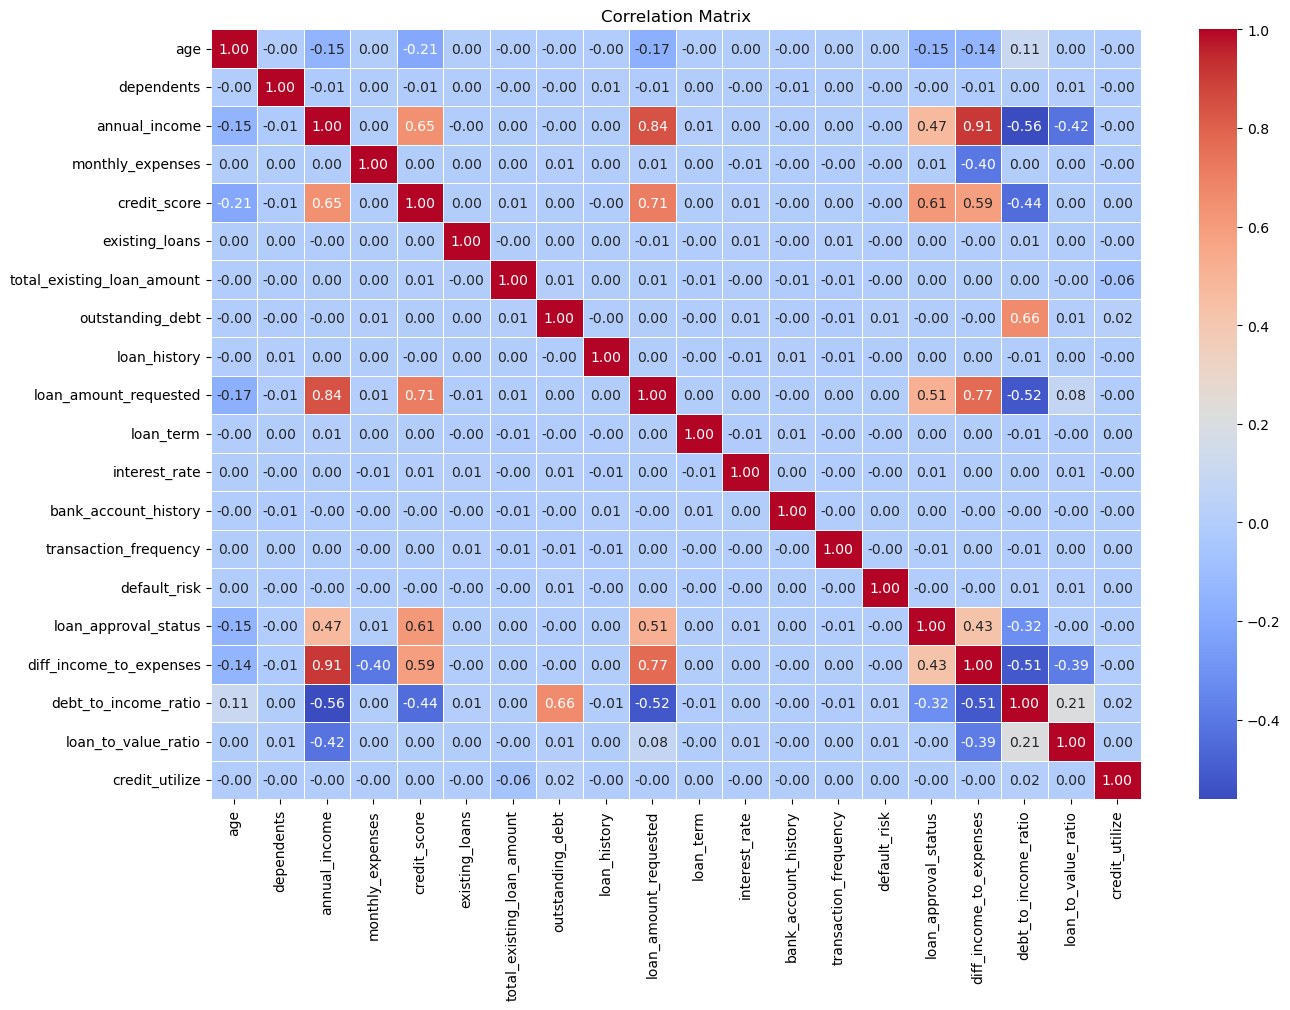

In [14]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(15, 10))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()

In [15]:
df.groupby(['employment_status','age_group'])['loan_approval_status'].mean()

employment_status  age_group       
Employed           Young Adult         0.151544
                   Middle Adult        0.731061
                   Middle Age          0.669291
                   Early Retirement    0.166667
Self-Employed      Young Adult         0.167774
                   Middle Adult        0.729497
                   Middle Age          0.686572
                   Early Retirement    0.156413
Unemployed         Young Adult         0.153333
                   Middle Adult        0.718403
                   Middle Age          0.671287
                   Early Retirement    0.137825
Name: loan_approval_status, dtype: float64

In [ ]:
dfd = df.copy()
dfd.select_dtypes(['object','category']).to_list()

In [29]:
import statsmodels.api as sm
# แปลงตัวแปรหมวดหมู่ (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=catg_features, drop_first=True)

# แยกตัวแปรอิสระและตาม
X = df_encoded.drop('credit_score', axis=1)
y = df_encoded['credit_score']

# สร้างโมเดล Regression
X = sm.add_constant(X)  # เพิ่ม Intercept
model = sm.OLS(y, X).fit()

# แสดงผลสรุป
print(model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

,age,annual_income,monthly_expenses,credit_score,total_existing_loan_amount,outstanding_debt,loan_amount_requested,loan_term,interest_rate,bank_account_history,...,age_group_Middle Age,age_group_Early Retirement,trans_freq_level_Meduium,trans_freq_level_High,loan_history_1,existing_loans_1,existing_loans_2,dependents_1,dependents_2,dependents_3
0,25,139901,2533,743,10942,19822,24535,209,4.27,8,...,False,False,True,False,False,False,False,False,True,False
1,36,21162,4041,468,48731,18321,8288,33,14.78,9,...,False,False,False,False,False,True,False,False,True,False
2,43,27815,3453,389,6925,13851,10308,159,12.33,7,...,True,False,False,True,False,False,True,False,False,False
3,28,137853,2732,778,42016,28608,33937,39,8.77,9,...,False,False,False,False,True,False,False,False,False,False
4,32,81753,1648,752,31747,8780,23360,34,9.04,1,...,False,False,False,False,True,False,True,False,False,False


In [21]:
# ฟีเจอร์ที่เกี่ยวข้องกับ loan approval status และค่าความสัมพันธ์ที่ได้จากการวิเคราะห์
selected_features = ['age_group','employment_status','credit_score', 
                     'diff_income_to_expenses', 'debt_to_income_ratio','loan_approval_status']



# ตรวจสอบว่า DataFrame มีฟีเจอร์เหล่านี้หรือไม่
df_selected = df[selected_features]
df_selected.head()

,age_group,employment_status,credit_score,diff_income_to_expenses,debt_to_income_ratio,loan_approval_status
0,Middle Adult,Employed,743,9125.416667,0.141686,1
1,Middle Adult,Employed,468,-2277.500000,0.865750,0
2,Middle Age,Self-Employed,389,-1135.083333,0.497969,0
3,Middle Adult,Self-Employed,778,8755.750000,0.207525,1
4,Middle Adult,Employed,752,5164.750000,0.107397,1


In [18]:
print(df_selected.index)

RangeIndex(start=0, stop=50499, step=1)


In [19]:
df_selected.columns = df_selected.columns.str.strip() 

In [23]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50499 entries, 0 to 50498
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age_group                50499 non-null  category
 1   employment_status        50499 non-null  object  
 2   credit_score             50499 non-null  int64   
 3   diff_income_to_expenses  50499 non-null  float64 
 4   debt_to_income_ratio     50499 non-null  float64 
 5   loan_approval_status     50499 non-null  int64   
dtypes: category(1), float64(2), int64(2), object(1)
memory usage: 2.0+ MB


In [24]:
df_selected.to_csv('loan_analyzed.csv', index=False)